## Diabetes Case Study

In this project, I will be using Machine Learning to predict whether a person has diabetes or not, based on patient's charecteristics such as blood pressure, body mass index (BMI), age, etc.

Then, I will choose the best model to build the predictions upon using scores to evaluate each model used.

The case study will follow the below workflow:

    1-Overview
    
    2-Data Description
    
    3-Data Exploration
    
    4-Data Preparation for ML Models
    
    5-Training and Evaluating each ML Model
    
    6-Interpreting the ML Model
    
    7- Concolusion

### 1- Overview

We’ll be using `Python` and some of its popular data science related packages. 

First of all, I will import `pandas` to read our data from a CSV file and manipulate it for further use. 

I will also use `numpy` to convert out data into a format suitable to feed our classification model. I’ll use `seaborn` and `matplotlib` for visualizations. 

After that, I will divide the dataset to traning data and testing data in order to train the model and then evaluate how well the model is doing.

I will then import `Random Forest Classifier`, `Ada Boost Classifier` & `Support Vector Machine` from `sklearn` to use them in calssification.

In [1]:
# Import our libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
sns.set(style="ticks")

%matplotlib inline

# Read in our dataset
diabetes = pd.read_csv('diabetes.csv')

### 2-Data Description

In [2]:
# Take a look at the first few rows of the dataset
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The following features have been provided to help us predict whether a person is diabetic or not:

**Pregnancies:**
Number of times pregnant

**Glucose:**
Plasma glucose concentration over 2 hours in an oral glucose tolerance test

**BloodPressure:**
Diastolic blood pressure (mm Hg)

**SkinThickness:** 
Triceps skin fold thickness (mm)

**Insulin:**
2-Hour serum insulin (mu U/ml)

**BMI:**
Body mass index (weight in kg/(height in m)2)

**DiabetesPedigreeFunction:**
Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)

**Age:**
Age (years)

**Outcome:**
Class variable (0 if non-diabetic, 1 if diabetic)


In [3]:
# Let's dive a little bit deeper into the dataset
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Let's explore the null values (if any)
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 3-Data Exploration

Let us now explore our data set to get a feel of what it looks like and get some insights about it.

Let’s start by finding correlation of every pair of features (and the outcome variable), and visualize the correlations using a heatmap.

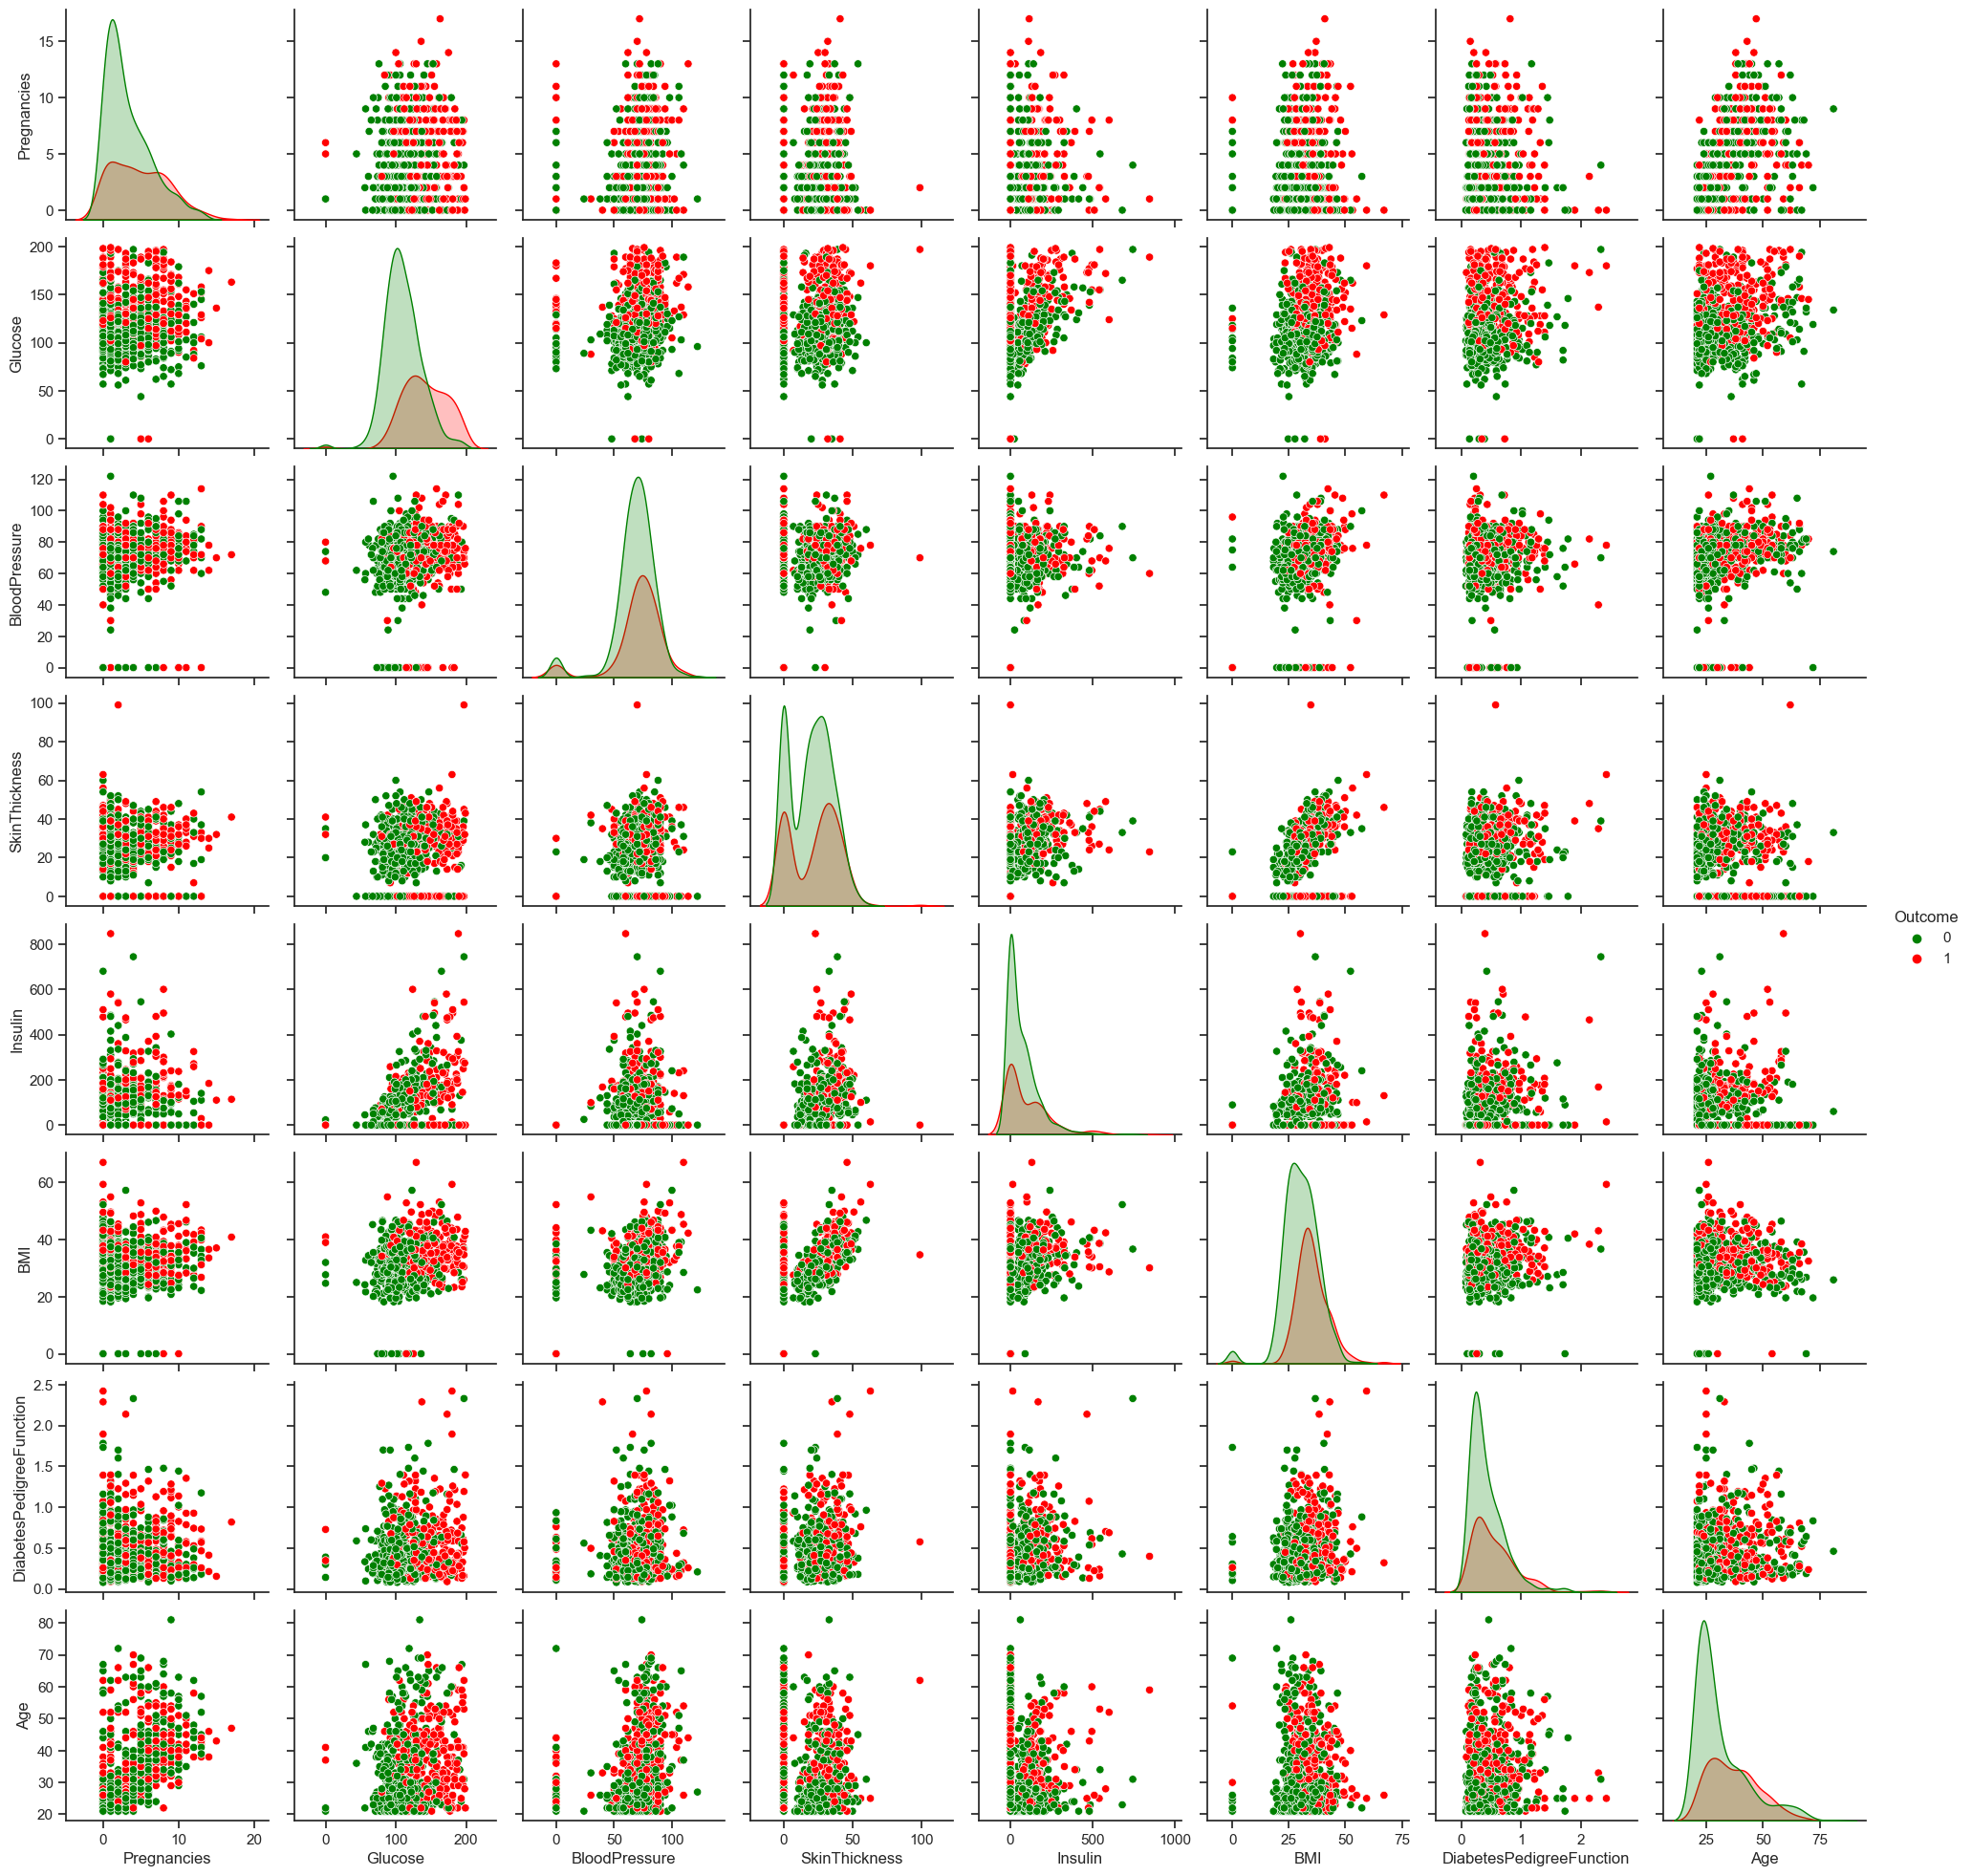

In [6]:
colors = ["green", "red"]
sns.pairplot(diabetes, hue="Outcome", palette=colors);

The above graphs show the correlations between each attribute of the patient and the outcome (being diabetec or not) 

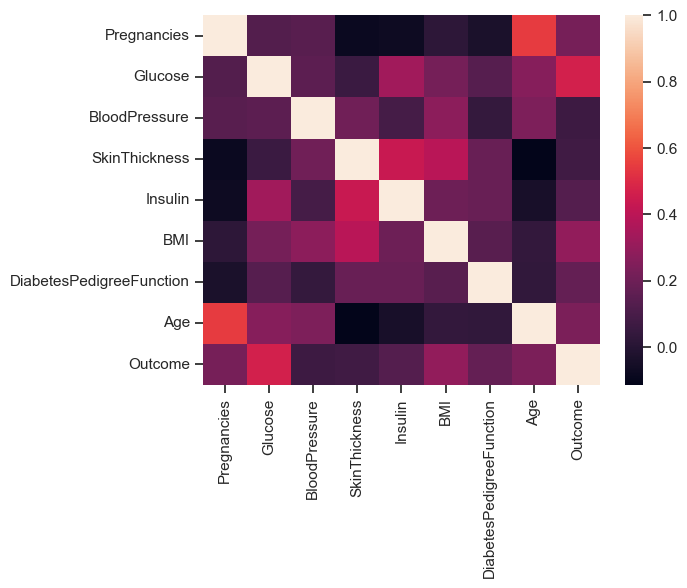

In [7]:
sns.heatmap(diabetes.corr(), cmap="rocket");

In the above heatmap, brighter colors indicate more correlation. 

As we can see from the table and the heatmap, glucose levels, age, BMI and number of pregnancies all have significant correlation with the outcome variable. Also notice the correlation between pairs of features, like age and pregnancies, or insulin and skin thickness.

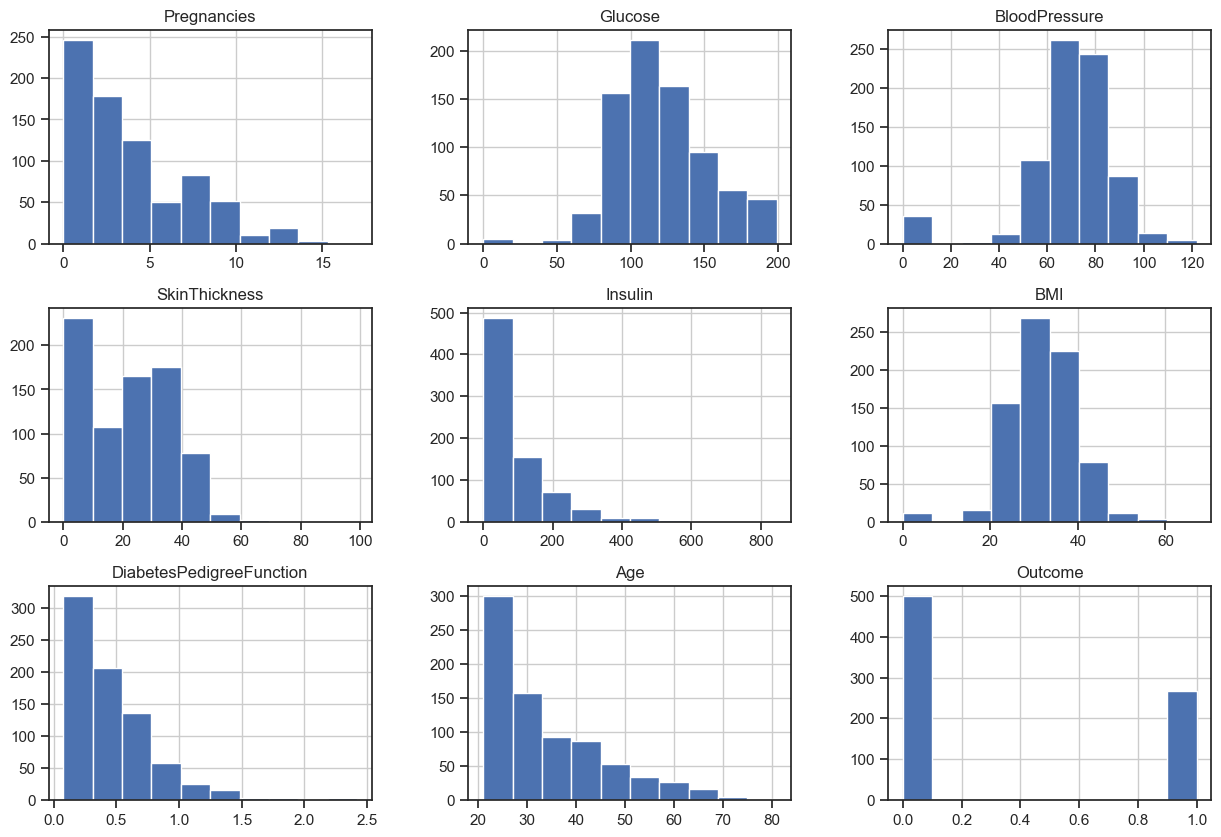

In [8]:
diabetes.hist(figsize=(15, 10));

### 4-Data Preparation for ML Models

When using machine learning algorithms we should always split our data into a training set and test set.

To train our model we will be using 20% of the records as training data. Then I will be using the rest 80% of the records for testing.

In [9]:
y = diabetes.iloc[:,-1]
X = diabetes.iloc[:,0:8]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5-Training and Evaluating each ML Model

Now that I have a training and testing dataset, let's create some models that and ultimately find the best of them. 

And tune these models to be the very best models they can be.

It can often be difficult (and extremely time consuming) to test all the possible hyperparameter combinations to find the best models. Therefore, it is often useful to set up a randomized search. In practice, randomized searches across hyperparameters have shown to be more time confusing, while still optimizing quite well.

In [10]:
def print_metrics(y_true, preds, model_name=None):
    '''
    INPUT:
    y_true - the y values that are actually true in the dataset (numpy array or pandas series)
    preds - the predictions for those values from some model (numpy array or pandas series)
    model_name - (str - optional) a name associated with the model if you would like to add it to the print statements 
    
    OUTPUT:
    None - prints the accuracy score, percision score, recall score, f1 score
    '''
    if model_name == None:
        print('Accuracy score: ', format(accuracy_score(y_true, preds)))
        print('Precision score: ', format(precision_score(y_true, preds)))
        print('Recall score: ', format(recall_score(y_true, preds)))
        print('F1 score: ', format(f1_score(y_true, preds)))
        print('\n\n')
    
    else:
        print('Accuracy score for ' + model_name + ' :' , format(accuracy_score(y_true, preds)))
        print('Precision for ' + model_name + ' :', format(precision_score(y_true, preds)))
        print('Recall for ' + model_name + ' :', format(recall_score(y_true, preds)))
        print('F1 Score ' + model_name + ' :', format(recall_score(y_true, preds)))
        print('\n\n')

In [11]:
# build a classifier for random forest
clf_rf = RandomForestClassifier()

# Set up the hyperparameter search
param_dist = {"max_depth": [1,3,20,  None],
              "n_estimators": list(range(10, 200)),
              "max_features": list(range(1, X_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


# Run a randomized search over the hyperparameters
random_search_rf = RandomizedSearchCV(clf_rf, param_distributions=param_dist)

# Fit the model on the training data
random_search_rf.fit(X_train, y_train)

# Make predictions on the test data
rf_preds = random_search_rf.best_estimator_.predict(X_test)

print_metrics(y_test, rf_preds, 'random forest')

Accuracy score for random forest : 0.7727272727272727
Precision for random forest : 0.6724137931034483
Recall for random forest : 0.7090909090909091
F1 Score random forest : 0.7090909090909091





In [12]:
# build a classifier for ada boost
clf_ada = AdaBoostClassifier()

# Set up the hyperparameter search
# look at  setting up your search for n_estimators, learning_rate
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
param_dist_ada = {"n_estimators": list(range(1, 200)),
              "learning_rate": [0.01,0.05,0.1,0.5,1,5,10,15,18,20]}

# Run a randomized search over the hyperparameters
random_search_ada = RandomizedSearchCV(clf_ada, param_distributions=param_dist_ada)

# Fit the model on the training data
random_search_ada.fit(X_train, y_train)

# Make predictions on the test data
ada_preds = random_search_ada.best_estimator_.predict(X_test)

# Return your metrics on test data
print_metrics(y_test, ada_preds, 'adaboost')

Accuracy score for adaboost : 0.7662337662337663
Precision for adaboost : 0.7209302325581395
Recall for adaboost : 0.5636363636363636
F1 Score adaboost : 0.5636363636363636





In [13]:
# build a classifier for support vector machines
clf_svc = SVC()

# Set up the hyperparameter search
# look at setting up your search for C (recommend 0-10 range), 
# kernel, and degree
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
param_list_svc = {"C": list(range(1,15)), "degree": list(range(1,15)) ,
              "kernel": ['linear','rbf']
             }


# Run a randomized search over the hyperparameters
svc_search = RandomizedSearchCV(clf_svc, param_distributions=param_list_svc)

# Fit the model on the training data
svc_search.fit(X_train, y_train)

# Make predictions on the test data
svc_preds = svc_search.best_estimator_.predict(X_test)

# Return your metrics on test data
print_metrics(y_test, svc_preds, 'svc')

Accuracy score for svc : 0.7597402597402597
Precision for svc : 0.6666666666666666
Recall for svc : 0.6545454545454545
F1 Score svc : 0.6545454545454545





Therefore, using `F1 score` Metric, It's shown that **Random Forest** is the best model to use. 

It makes sense to use f1 score to determine best in this case given the imbalance of classes.

### 6-Interpreting the ML Model

Once found the best model, it is also important to understand why it is performing well.

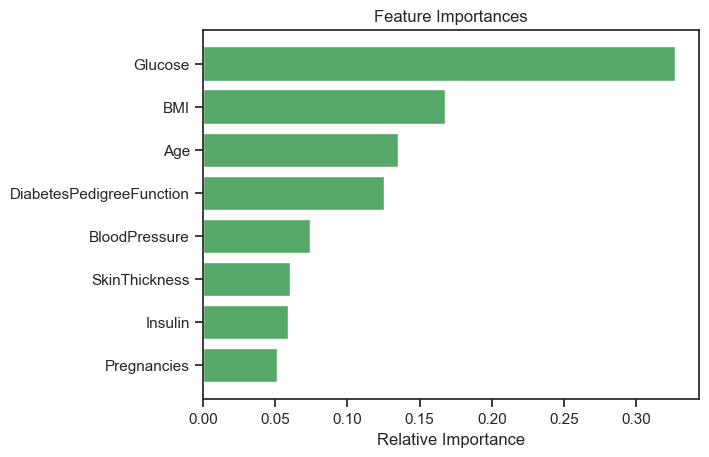

In [15]:
features = diabetes.columns[:diabetes.shape[1]]
importances = random_search_rf.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance');

### 7- Concolusion

In this case study, we looked at predicting diabetes for 768 patients.  Around 35% of patients having diabetes.  There were no missing data, and initial looks at the data showed it would be difficult to separate patients with diabetes from those that did not have diabetes.

**Three advanced modeling techniques were used to predict whether or not a patient has diabetes.  The most successful of these techniques proved to be an `Random Forest` technique, which had the following metrics:**

Accuracy score for random forest : 0.772

Precision for random forest : 0.672

Recall for random forest : 0.709

F1 Score random forest : 0.709

Based on the initial look at the data, it is unsurprising that `Glucose`, `BMI`, and `Age` were important in understanding if a patient has diabetes.  These were consistent with more sophisticated approaches.  Interesting findings were that `pregnancy` looked to be correlated when initially looking at the data.  However, this was likely due to its large correlation with `age`.